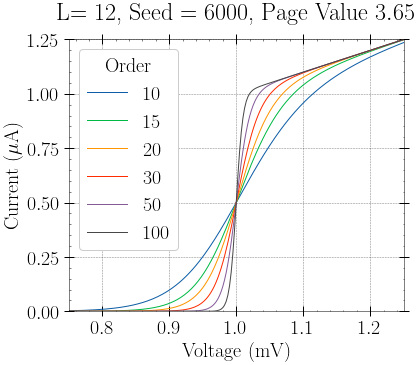

In [99]:
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
import numpy as np
import matplotlib.pyplot as plt

def model(x, p):
    return x ** (2 * p + 1) / (1 + x ** (2 * p))


pparam = dict(xlabel='Voltage (mV)', ylabel='Current ($\mu$A)')

x = np.linspace(0.75, 1.25, 201)

plt.rc('font', **font)

with plt.style.context(['science','grid']):
    fig, ax = plt.subplots(figsize=(6, 5))
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    ax.set_title(r"L$=12$, Seed = $6000$, Page Value $3.65$", pad=20)
    ax.tick_params(axis="x", direction="inout", length=10, width=1, color="k")
    ax.tick_params(axis="y", direction="inout", length=10, width=1, color="k")
    #fig.savefig('figures/fig1.pdf')
    #fig.savefig('fig1.jpg', dpi=600)


## Scatter plot

/var/folders/g5/w2_4q9x504zd1hn9cb6yqbm40000gn/T/ipykernel_26027/277808982.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(orientation="vertical").set_label(label='',


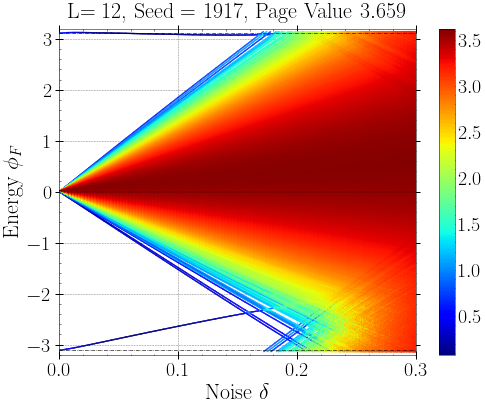

In [96]:
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
import numpy as np
import matplotlib.pyplot as plt
L = 12
SEED = 1917
X,Y,W = np.loadtxt('plot_data_'+str(L)+'_'+str(SEED)+'.txt',delimiter = '\t', unpack=True)
x = X.tolist() # delta
y = Y.tolist() # energy
w = W.tolist() # entropy
Page_value = str(np.around((L/2)*np.log(2)-0.5,3))
with plt.style.context(['science', 'scatter','grid']):
    fig, ax = plt.subplots(figsize=(8, 6))
    #ax.plot([-2, 2], [-2, 2], 'k--')
    #ax.fill_between([-2, 2], [-2.2, 1.8], [-1.8, 2.2],
                    #color='dodgerblue', alpha=0.2, lw=0)
    plt.scatter(x, y, c=w, cmap='jet', s=0.1)    
    #lgd = r"L$=12$"
    #ax.legend(title=lgd, loc=4, ncol=1)
    ax.set_title(r"L$="+str(L)+"$, Seed = $"+str(SEED)+"$, Page Value $"+str(Page_value)
                 +"$",size=22, pad=10)
    xlbl = r"Noise $\delta$"
    ylbl = r"Energy $\phi_{F}$"
    ax.set_xlabel(xlbl,size = 22)
    ax.set_ylabel(ylbl,size = 22)
    ax.set_xlim([0, 0.3])
    ax.set_ylim([-3.2, 3.2])
    #ax = f.gca()
    ax.tick_params(axis="x", direction="inout", length=8, width=1, color="k")
    ax.tick_params(axis="y", direction="inout", length=8, width=1, color="k")
    plt.axhline(y=3.11034138188, color='k', linestyle='dashdot',linewidth = 0.6)
    plt.axhline(y=-3.11034138188, color='k', linestyle='dashdot',linewidth = 0.6)
    plt.axhline(y=0, color='k', linestyle='dashdot',linewidth = 0.4)
    plt.colorbar(orientation="vertical").set_label(label='',
                                                   size=15,labelpad=10)
    #fig.savefig('figures/fig3.pdf')
    fig.savefig('energy_noise_'+str(L)+'_'+str(SEED)+'.jpg', dpi=600)

## Probability vs time

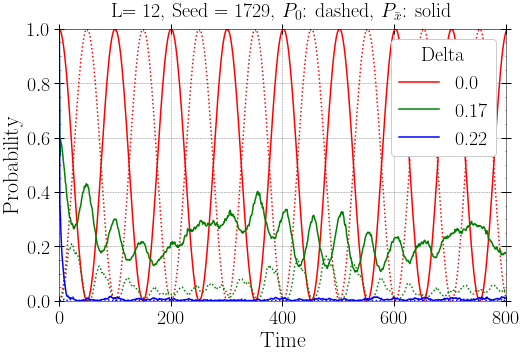

In [188]:
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
import numpy as np
import matplotlib.pyplot as plt


L = 12
SEED = 1729
Lindwidth = 1.5
delta1 = 0.0
P11,P12,I1 = np.loadtxt(str(delta1)+'_probability_data.txt', delimiter = '\t', unpack=True)
p11 = P11.tolist()
p12 = P12.tolist()
i1 = I1.tolist()

delta2 = 0.17
P21,P22,I2 = np.loadtxt(str(delta2)+'_probability_data.txt', delimiter = '\t', unpack=True)
p21 = P21.tolist()
p22 = P22.tolist()
i2 = I2.tolist()

delta6 = 0.22
P61,P62,I6 = np.loadtxt(str(delta6)+'_probability_data.txt', delimiter = '\t', unpack=True)
p61 = P61.tolist()
p62 = P62.tolist()
i6 = I6.tolist()

with plt.style.context(['science','grid']):
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #ax.plot(x, model(x, p), label=p)
    ax.plot(i1,p11,color='r', linestyle="dotted",linewidth=Lindwidth)#,marker='o')
    ax.plot(i1,p12,color='r',label = str(delta1),linewidth=Lindwidth)#,marker='o')
    
    ax.plot(i2,p21,color='green', linestyle="dotted",linewidth=Lindwidth)#,marker='o')
    ax.plot(i2,p22,color='green',label = str(delta2),linewidth=Lindwidth)#,marker='o')
    
    ax.plot(i6,p61,color='b', linestyle="dotted",linewidth=Lindwidth)#,marker='o')
    ax.plot(i6,p62,color='b',label = str(delta6),linewidth=Lindwidth)#,marker='o')
    
    
    """ 
    Legend options: upper right,upper right,lower left,lower right,
    right,center left,center right,lower center,upper center,center.
    
    """
    
    ax.legend(title='Delta',loc='upper right')
    ax.autoscale(tight=True)
    
    xlbl = r"Time"
    ylbl = r"Probability"
    ax.set_xlabel(xlbl,size = 22)
    ax.set_ylabel(ylbl,size = 22)
    ax.set_xlim([0, 800])
    ax.set_ylim([0, 1])
    
    ax.set_title(r"L$="+str(L)+"$, Seed = $"+str(SEED)+"$, $P_{0}$"+
                 r": dashed, $P_{\Bar{x}}$"+r": solid",size=20, pad=12)
    ax.tick_params(axis="x", direction="inout", length=10, width=1, color="k")
    ax.tick_params(axis="y", direction="inout", length=10, width=1, color="k")
    fig.savefig('probability_time_'+str(L)+'_'+str(SEED)+'.jpg', dpi=600)